**Import The Necessary Libraries**

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [213]:
df = pd.read_csv(r"C:\Users\HUAWEI\Desktop\Uber Dataset.csv")
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.10,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.00,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.80,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.70,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.70,Customer Visit


**Check for Missing Values**

In [206]:
df.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [209]:
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [215]:
df = df.dropna()

In [220]:
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [219]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format='%m/%d/%Y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format='%m/%d/%Y %H:%M')
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.10,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.80,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.70,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.70,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.30,Meal/Entertain
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.70,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.90,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.20,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.40,Temporary Site


In [221]:
hour = []
day = []
day_of_week = []
month = []
weekday = []

for x in df['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    day_of_week.append(x.day_of_week)
    month.append(x.month)
    weekday.append(calendar.day_name[day_of_week[-1]])

df['HOUR'] = hour
df['DAY'] = day
df['DAY_OF_WEEK'] = day_of_week
df['MONTH'] = month
df['WEEKDAY'] = weekday

In [224]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.10,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.80,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.70,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.70,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.30,Meal/Entertain,17,6,2,1,Wednesday


**Categories We Have**

In [225]:
df['CATEGORY*'].value_counts()

CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

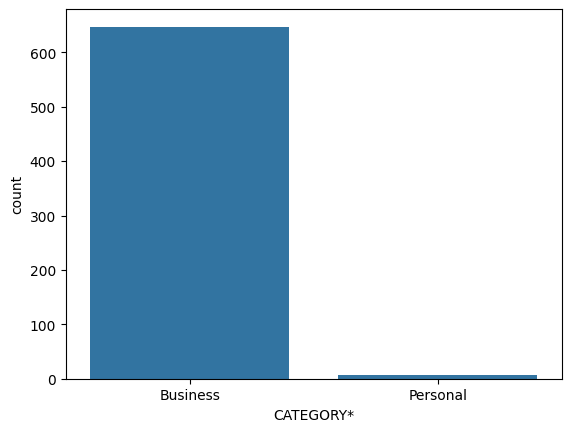

In [226]:
sns.countplot(x='CATEGORY*', data=df)

**How long do people travel with Uber?**

<Axes: ylabel='Frequency'>

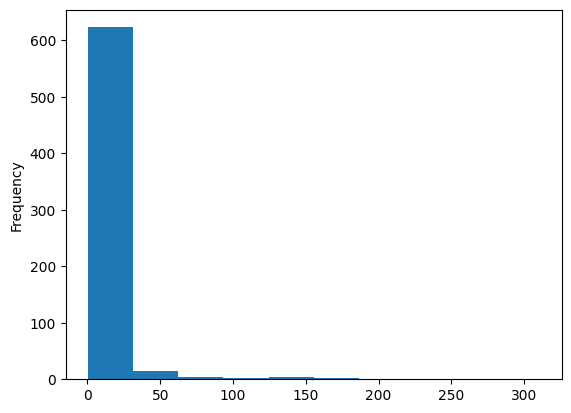

In [230]:
df['MILES*'].plot.hist()

**What Hour Do Most People Take Uber To Their Destination?**

Text(0.5, 1.0, 'Number of Trips Vs Hours')

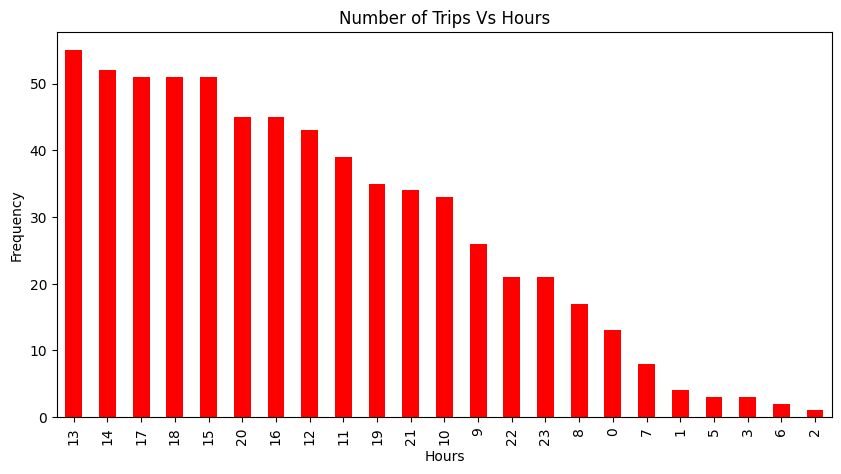

In [237]:
hours_taken = df['START_DATE*'].dt.hour.value_counts()
hours_taken.plot(kind='bar', color='red', figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips Vs Hours')

**Check The Purpose Of Trips**

<Axes: xlabel='PURPOSE*'>

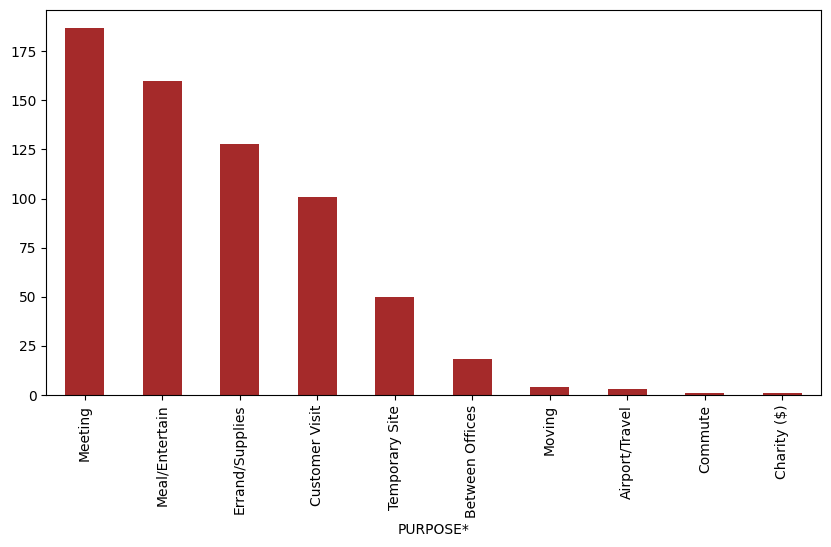

In [240]:
df['PURPOSE*'].value_counts().plot(kind='bar', figsize=(10,5), color='brown')

**Which Day Has The Highest Number Of Trips**

<Axes: xlabel='WEEKDAY'>

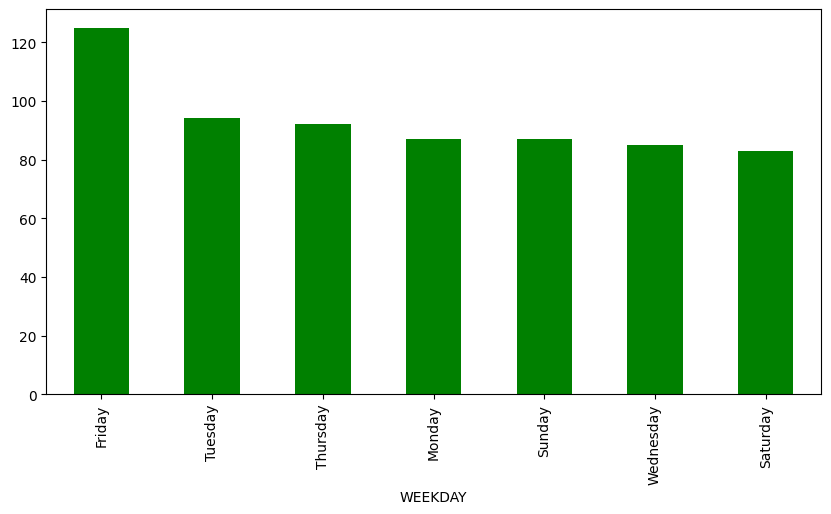

In [242]:
df['WEEKDAY'].value_counts().plot(kind='bar', figsize=(10,5), color='green')

**What Are The Number Of Trips Per Each Day?**

<Axes: xlabel='DAY'>

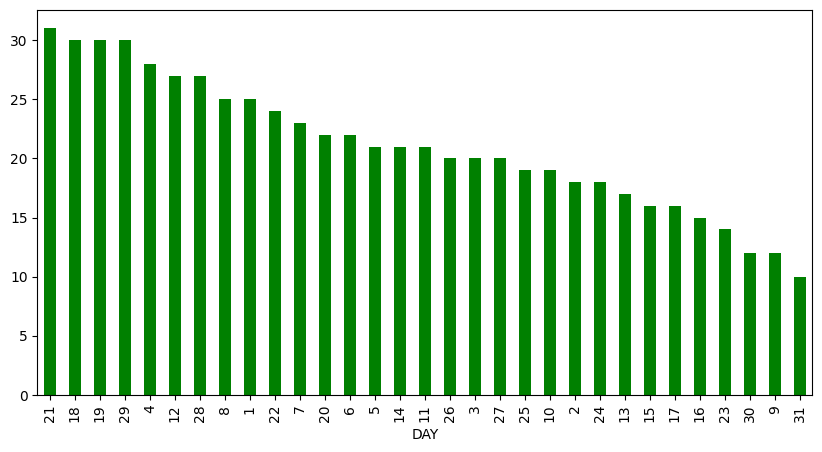

In [243]:
df['DAY'].value_counts().plot(kind='bar', figsize=(10,5), color='green')

**What Are The Trips In The Month**

<Axes: xlabel='MONTH'>

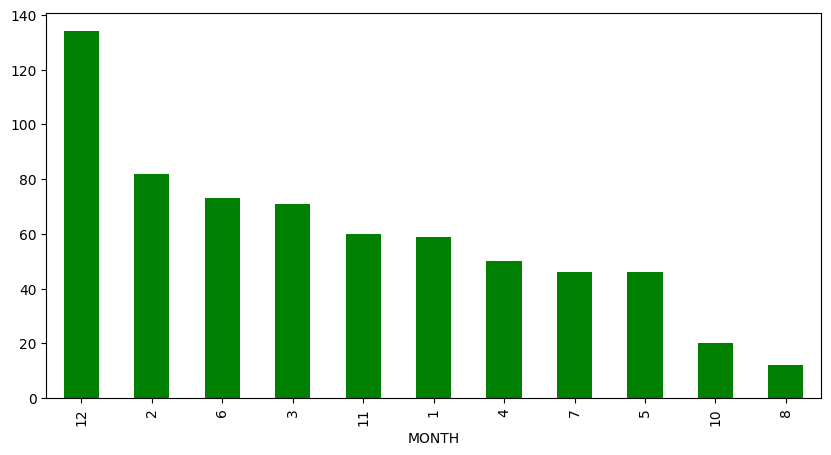

In [244]:
df['MONTH'].value_counts().plot(kind='bar', figsize=(10,5), color='green')

**The starting points of trips. Where Do People Start Boarding Their Trip From Most?**

<Axes: xlabel='START*'>

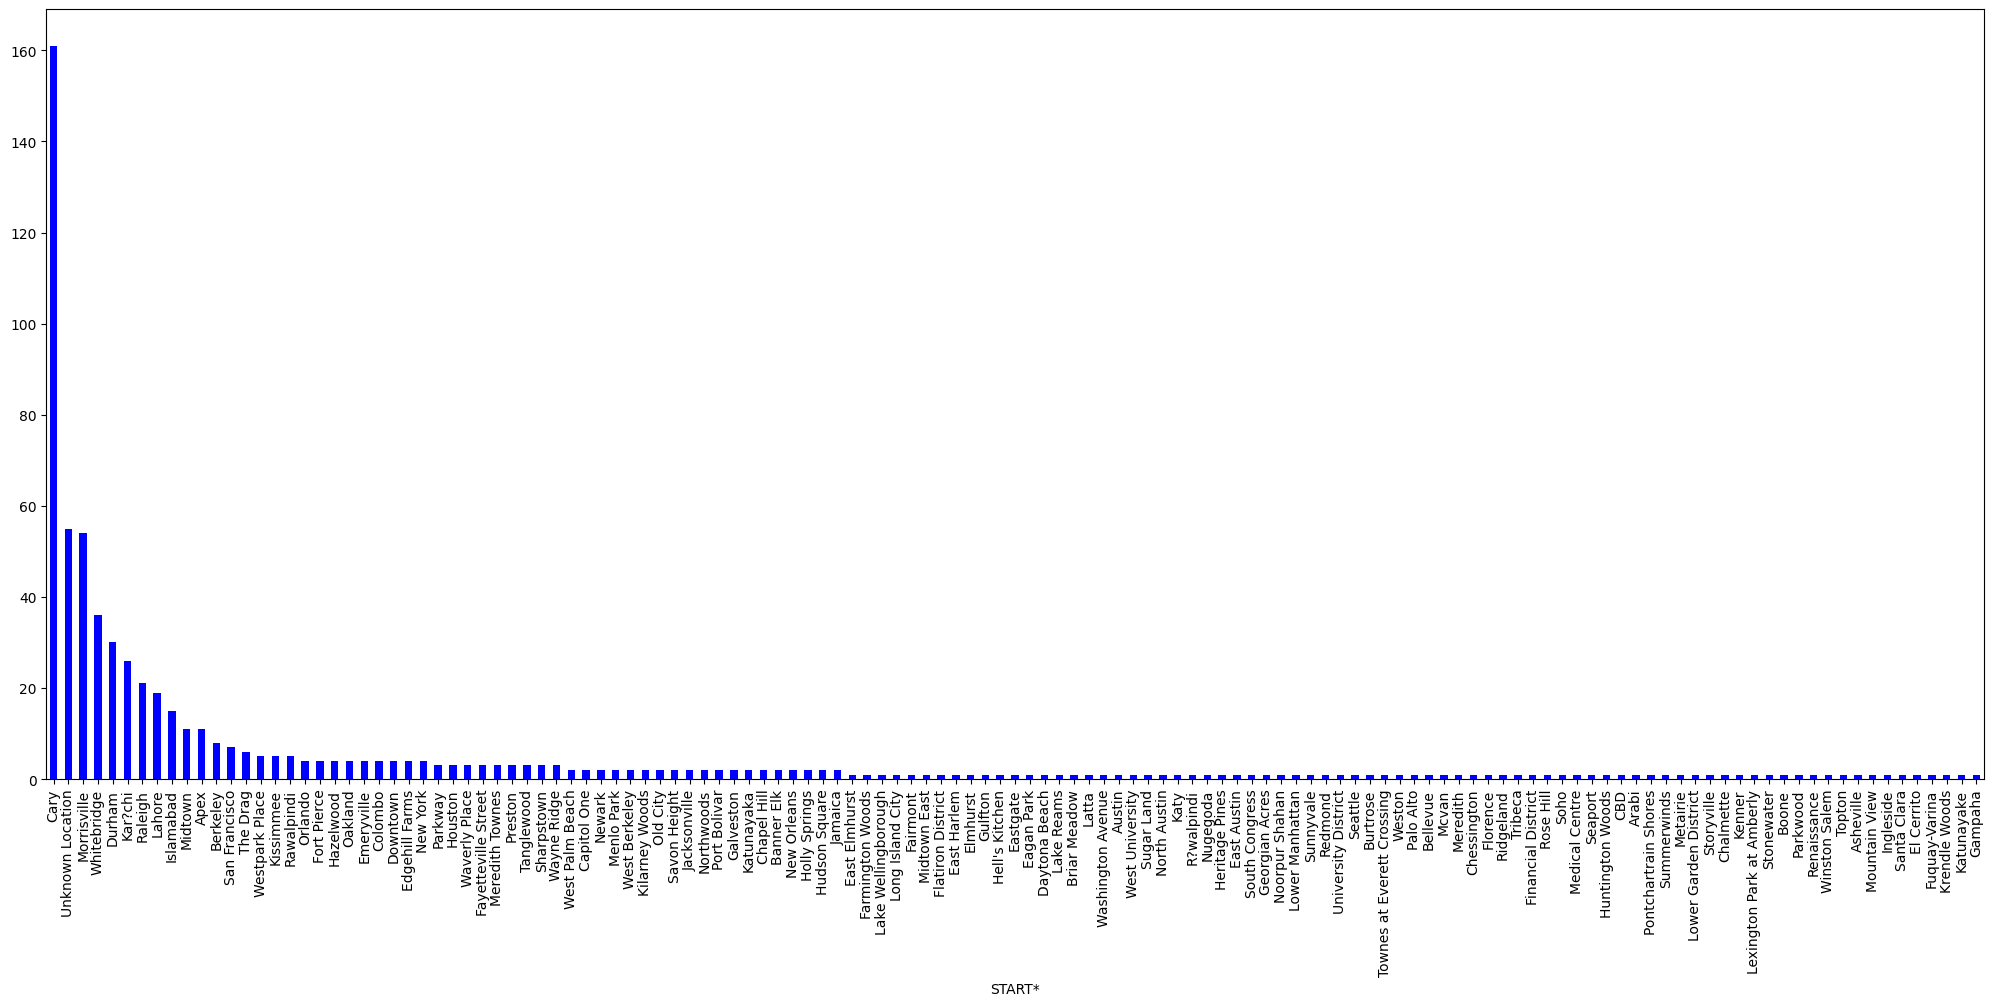

In [251]:
df['START*'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')